# Dendritic cell algorithm

## Import and fetching data

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
#starting the experiment with 10% of the dataset
path = "../data/kddcup.data_10_percent.gz"

In [3]:
#added column names manually due to the format issue above
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [4]:
#reading dataset
df = pd.read_csv(path,names=columns)

In [5]:
#attack types
attack_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
'snmpgetattack' : 'r2l',
'mailbomb' : 'dos',
'snmpguess' : 'r2l',
'mscan' : 'probe',
'apache2' : 'dos',
'processtable' : 'dos',
'saint' : 'probe',
'httptunnel' : 'r2l',
'named' : 'r2l',
'sendmail' : 'r2l',
'ps' : 'u2r',
'xterm' : 'u2r',
'xlock' : 'r2l',
'xsnoop' : 'r2l',
'worm' : 'dos',
'udpstorm' : 'dos',
'sqlattack' : 'u2r',

}

In [6]:
#attack types
attack_types_high = {
    'normal': 'normal',
'back': 'abnormal',
'buffer_overflow': 'abnormal',
'ftp_write': 'abnormal',
'guess_passwd': 'abnormal',
'imap': 'abnormal',
'ipsweep': 'abnormal',
'land': 'abnormal',
'loadmodule': 'abnormal',
'multihop': 'abnormal',
'neptune': 'abnormal',
'nmap': 'abnormal',
'perl': 'abnormal',
'phf': 'abnormal',
'pod': 'abnormal',
'portsweep': 'abnormal',
'rootkit': 'abnormal',
'satan': 'abnormal',
'smurf': 'abnormal',
'spy': 'abnormal',
'teardrop': 'abnormal',
'warezclient': 'abnormal',
'warezmaster': 'abnormal',
'snmpgetattack' : 'abnormal',
'mailbomb' : 'abnormal',
'snmpguess' : 'abnormal',
'mscan' : 'abnormal',
'apache2' : 'abnormal',
'processtable' : 'abnormal',
'saint' : 'abnormal',
'httptunnel' : 'abnormal',
'named' : 'abnormal',
'sendmail' : 'abnormal',
'ps' : 'abnormal',
'xterm' : 'abnormal',
'xlock' : 'abnormal',
'xsnoop' : 'abnormal',
'worm' : 'abnormal',
'udpstorm' : 'abnormal',
'sqlattack' : 'abnormal',

}

In [7]:
#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attack_types[r[:-1]])
df['Attack Type High'] = df.target.apply(lambda r:attack_types_high[r[:-1]])

df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [8]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,Attack Type High
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal


## Generating Antigen Types 

We are using three categorical variables named "flag", "service" and "protocol_type" to create antigen types.

In [10]:
len(df['flag'].value_counts().index.tolist())
#11 values

11

In [11]:
len(df['service'].value_counts().index.tolist())
#66 values

66

In [12]:
len(df['protocol_type'].value_counts().index.tolist())
#3 values

3

In [13]:
#Creating antigen type by concatenating three variables into one
antigen_type = df[['flag', 'service', 'protocol_type']].agg('-'.join, axis=1)

In [14]:
len(antigen_type.value_counts().index.tolist())
#210 antigen types

210

In [15]:
#Finding out the proportions of antigen types
antigen_type.value_counts(normalize=True)

SF-ecr_i-icmp       0.569611
S0-private-tcp      0.165912
SF-http-tcp         0.118511
REJ-private-tcp     0.039893
SF-smtp-tcp         0.019364
                      ...   
SF-pm_dump-tcp      0.000002
RSTR-ftp-tcp        0.000002
S2-other-tcp        0.000002
RSTO-gopher-tcp     0.000002
RSTR-courier-tcp    0.000002
Length: 210, dtype: float64

In [16]:
#converting the categorical values to numerical index
antigentype_code = antigen_type.astype('category')

In [17]:
#categories
antigentype_code.cat.categories

Index(['OTH-ftp_data-tcp', 'OTH-private-tcp', 'REJ-IRC-tcp', 'REJ-X11-tcp',
       'REJ-Z39_50-tcp', 'REJ-auth-tcp', 'REJ-bgp-tcp', 'REJ-courier-tcp',
       'REJ-csnet_ns-tcp', 'REJ-ctf-tcp',
       ...
       'SF-tim_i-icmp', 'SF-time-tcp', 'SF-urh_i-icmp', 'SF-urp_i-icmp',
       'SH-ctf-tcp', 'SH-imap4-tcp', 'SH-nntp-tcp', 'SH-pop_3-tcp',
       'SH-private-tcp', 'SH-telnet-tcp'],
      dtype='object', length=210)

In [18]:
#Corresponding codes with their counts
antigentype_code.cat.codes.value_counts()

177    281400
135     81964
182     58547
32      19708
195      9566
        ...  
90          1
92          1
93          1
95          1
0           1
Length: 210, dtype: int64

In [19]:
#Double checking if the codes correspond to the same antigen type
antigentype_code.cat.categories[177]

'SF-ecr_i-icmp'

In [20]:
#creating a new column antigentype_index
df['antigentype_index'] = antigentype_code.cat.codes

In [21]:
#Dropping the three categorical variables
df.drop('flag',axis = 1,inplace= True)
df.drop('service',axis = 1,inplace= True)
df.drop('protocol_type',axis = 1,inplace= True)

In [22]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,Attack Type High,antigentype_index
0,0,181,5450,0,0,0,0,0,1,0,...,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal,182
1,0,239,486,0,0,0,0,0,1,0,...,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal,182
2,0,235,1337,0,0,0,0,0,1,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal,182
3,0,219,1337,0,0,0,0,0,1,0,...,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal,182
4,0,217,2032,0,0,0,0,0,1,0,...,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal,normal,182


In [23]:
df1 = df.groupby(['antigentype_index','Attack Type High']).size() \
        .unstack(fill_value=0) \
        .add_prefix('target = ')
df1['total_count'] = df1.sum(axis=1)
pd.set_option('display.max_rows', 500)
df1

Attack Type High,target = abnormal,target = normal,total_count
antigentype_index,,,
0,0,1,1
1,7,0,7
2,1,0,1
3,1,1,2
4,18,0,18
5,21,0,21
6,24,0,24
7,19,0,19
8,24,0,24


In [24]:
#Creating the labels for antigen_type
df1['target'] = df1.apply(lambda x : True if x['target = abnormal'] >= 0.8 * x['total_count'] else False, axis=1)

In [25]:
#Dropping the unnecessary columns
df1.drop('target = abnormal',axis = 1,inplace= True)
df1.drop('target = normal',axis = 1,inplace= True)
df1.drop('total_count',axis = 1,inplace= True)

In [26]:
df1['target'][209] #checking the label value

True

## Linear Normalization

We need to find the range [m, n] for each attribute where an anomaly (PAMP, Danger signals) and normality (safe signals) occurs and perform linear normalization with the values from 0 to 100.

After choosing the ranges for each attribute type, we will perform linear normalization which is to transform these attributes to the range between 0 to 100.

In [27]:
def LinearNormalization (x, m, n):
    if m < n:
        if x < m:
             return float(0)
        if x > n:
            return float(100)
        else:
            return float((x-m)/(n-m))
    elif m >= n:
        if x > m:
            return (0)
        if x < n:
            return float(100)
        else:
            return float((x-m)/(n-m))

## Input signals

There are three types of input signals. PAMP (definite anomaly), Danger (possibility of anomaly as the value increases), Safe (absolute normal)

Currently using the features/attributes mentioned in gu2008:further. 

#TODO: calculate the information gain or any relevant technique to find suitable features for each input signal. 

### Attributes for PAMP signals

Using the columns(features): serror_rate, srv_serror_rate, same_srv_rate, dst_host_serror_rate, dst_host_rerror_rate

#### Checking [m,n] range for serror_rate

In [28]:
df['serror_rate'].describe()

count    494021.000000
mean          0.176687
std           0.380717
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: serror_rate, dtype: float64

In [29]:
#finding min, max, mean, median, standard deviation values for the attribute
res_serror_rate_high = df.groupby('Attack Type High').agg({'serror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_serror_rate_high

serror_rate                                
                         min  max      mean median       std
Attack Type High                                            
abnormal                 0.0  1.0  0.219620    0.0  0.413441
normal                   0.0  1.0  0.001586    0.0  0.027868

In [30]:
#finding min, max, mean, median, standard deviation values for the attribute
res_serror_rate = df.groupby('Attack Type').agg({'serror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_serror_rate

serror_rate                                 
                    min   max      mean median       std
Attack Type                                             
dos                 0.0  1.00  0.221804    0.0  0.415353
normal              0.0  1.00  0.001586    0.0  0.027868
probe               0.0  1.00  0.070789    0.0  0.175653
r2l                 0.0  1.00  0.011403    0.0  0.098889
u2r                 0.0  0.99  0.038077    0.0  0.192242

As we can see that the value for anomolous entries is higher than that of normal and is averaging around 0.21 with a SD of 0.41. However, the value for certain attack types like r2l and u2r is still pretty low. Therefore, we will start the lower range from 0.5 to 0.99

In [31]:
#performing linear normalization:
df['serror_rate'] = df['serror_rate'].apply(lambda x: LinearNormalization(x, 0.5,0.99))

In [32]:
df['serror_rate'].describe()

count    494021.000000
mean         17.517713
std          38.010789
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: serror_rate, dtype: float64

#### Checking range for srv_serror_rate

In [33]:
df['srv_serror_rate'].describe()

count    494021.000000
mean          0.176609
std           0.381017
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: srv_serror_rate, dtype: float64

In [34]:
#finding min, max, mean, median, standard deviation values for the attribute
res_srv_serror_rate_high = df.groupby('Attack Type High').agg({'srv_serror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_srv_serror_rate_high

srv_serror_rate                                
                             min  max      mean median       std
Attack Type High                                                
abnormal                     0.0  1.0  0.219472    0.0  0.413842
normal                       0.0  1.0  0.001794    0.0  0.026578

In [35]:
#finding min, max, mean, median, standard deviation values for the attribute
res_srv_serror_rate = df.groupby('Attack Type').agg({'srv_serror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_srv_serror_rate

srv_serror_rate                                
                        min  max      mean median       std
Attack Type                                                
dos                     0.0  1.0  0.221638    0.0  0.415317
normal                  0.0  1.0  0.001794    0.0  0.026578
probe                   0.0  1.0  0.073090    0.0  0.259080
r2l                     0.0  1.0  0.010648    0.0  0.090837
u2r                     0.0  0.0  0.000000    0.0  0.000000

Quite similar pattern as serror_rate. Therefore, we will use [m,n] = [0.50,0.99]

In [36]:
#performing linear normalization:
df['srv_serror_rate'] = df['srv_serror_rate'].apply(lambda x: LinearNormalization(x, 0.50,0.99))

In [37]:
df['srv_serror_rate'].describe()

count    494021.000000
mean         17.621183
std          38.099977
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: srv_serror_rate, dtype: float64

#### Checking range for same_srv_rate

In [38]:
df['same_srv_rate'].describe()

count    494021.000000
mean          0.791547
std           0.388189
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: same_srv_rate, dtype: float64

In [39]:
#finding min, max, mean, median, standard deviation values for the attribute
res_same_srv_rate_high = df.groupby('Attack Type High').agg({'same_srv_rate': ['min', 'max', 'mean', 'median', 'std']})
res_same_srv_rate_high

same_srv_rate                                
                           min  max      mean median       std
Attack Type High                                              
abnormal                   0.0  1.0  0.743991    1.0  0.417213
normal                     0.0  1.0  0.985502    1.0  0.092276

In [40]:
#finding min, max, mean, median, standard deviation values for the attribute
res_same_srv_rate = df.groupby('Attack Type').agg({'same_srv_rate': ['min', 'max', 'mean', 'median', 'std']})
res_same_srv_rate

same_srv_rate                                
                      min  max      mean median       std
Attack Type                                              
dos                  0.00  1.0  0.744878    1.0  0.416646
normal               0.00  1.0  0.985502    1.0  0.092276
probe                0.00  1.0  0.587711    1.0  0.474969
r2l                  0.50  1.0  0.997043    1.0  0.037701
u2r                  0.01  1.0  0.931538    1.0  0.216382

This is a different and complex case where the mean value for r2l is higher than of normal while other attack types have lower values. To go with the majority, we will choose [m,n] = [0.90,0.55]

In [41]:
#performing linear normalization:
df['same_srv_rate'] = df['same_srv_rate'].apply(lambda x: LinearNormalization(x, 0.90, 0.55))

In [42]:
df['same_srv_rate'].describe()

count    494021.000000
mean         22.452571
std          41.726178
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: same_srv_rate, dtype: float64

#### Checking ranges for dst_host_serror_rate

In [43]:
df['dst_host_serror_rate'].describe()

count    494021.000000
mean          0.176754
std           0.380593
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: dst_host_serror_rate, dtype: float64

In [44]:
#finding min, max, mean, median, standard deviation values for the attribute
res_dst_host_serror_rate_high = df.groupby('Attack Type High').agg({'dst_host_serror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_dst_host_serror_rate_high

dst_host_serror_rate                                
                                  min  max      mean median       std
Attack Type High                                                     
abnormal                          0.0  1.0  0.219572    0.0  0.413333
normal                            0.0  1.0  0.002121    0.0  0.029422

In [45]:
#finding min, max, mean, median, standard deviation values for the attribute
res_dst_host_serror_rate = df.groupby('Attack Type').agg({'dst_host_serror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_dst_host_serror_rate

dst_host_serror_rate                                
                             min  max      mean median       std
Attack Type                                                     
dos                          0.0  1.0  0.221740    0.0  0.415295
normal                       0.0  1.0  0.002121    0.0  0.029422
probe                        0.0  1.0  0.070058    0.0  0.169181
r2l                          0.0  1.0  0.021554    0.0  0.088527
u2r                          0.0  0.0  0.000000    0.0  0.000000

The value for u2r attack is 0. Otherwise most attack types have higher value than normal. Also the value for r2l is overlapping the range with normal. So we will start with the average value of r2l. Therefore, [m,n] = [0.01, 0.50]

In [46]:
#performing linear normalization:
df['dst_host_serror_rate'] = df['dst_host_serror_rate'].apply(lambda x: LinearNormalization(x, 0.01,0.50))

In [47]:
df['dst_host_serror_rate'].describe()

count    494021.000000
mean         17.615391
std          38.093628
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: dst_host_serror_rate, dtype: float64

#### Checking range for dst_host_rerror_rate

In [48]:
df['dst_host_rerror_rate'].describe()

count    494021.000000
mean          0.058118
std           0.230590
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: dst_host_rerror_rate, dtype: float64

In [49]:
#finding min, max, mean, median, standard deviation values for the attribute
res_dst_host_rerror_rate_high = df.groupby('Attack Type High').agg({'dst_host_rerror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_dst_host_rerror_rate_high

dst_host_rerror_rate                                
                                  min  max      mean median       std
Attack Type High                                                     
abnormal                          0.0  1.0  0.058216    0.0  0.231941
normal                            0.0  1.0  0.057717    0.0  0.224995

In [50]:
#finding min, max, mean, median, standard deviation values for the attribute
res_dst_host_rerror_rate = df.groupby('Attack Type').agg({'dst_host_rerror_rate': ['min', 'max', 'mean', 'median', 'std']})
res_dst_host_rerror_rate

dst_host_rerror_rate                                 
                             min   max      mean median       std
Attack Type                                                      
dos                          0.0  1.00  0.053114   0.00  0.223212
normal                       0.0  1.00  0.057717   0.00  0.224995
probe                        0.0  1.00  0.548300   0.81  0.441584
r2l                          0.0  0.96  0.045178   0.00  0.190914
u2r                          0.0  0.73  0.039615   0.00  0.140893

The values for dos, r2l, u2r are quite close to the normal and are linearly inseparable. While the probe attack clearly has a high value. Therefore, we will go with high averages. [m,n] = [0.30,0.80] 

In [51]:
#performing linear normalization:
df['dst_host_rerror_rate'] = df['dst_host_rerror_rate'].apply(lambda x: LinearNormalization(x, 0.30,0.80))

In [52]:
df['dst_host_rerror_rate'].describe()

count    494021.000000
mean          5.602278
std          22.992909
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: dst_host_rerror_rate, dtype: float64

### Attributes for Danger signals 

Using the columns(features): count, srv_count

#### Checking range for count

In [53]:
df['count'].describe()

count    494021.000000
mean        332.285690
std         213.147412
min           0.000000
25%         117.000000
50%         510.000000
75%         511.000000
max         511.000000
Name: count, dtype: float64

In [54]:
#finding min, max, mean, median, standard deviation values for the attribute
res_count_high = df.groupby('Attack Type High').agg({'count': ['min', 'max', 'mean', 'median', 'std']})
res_count_high

count                                    
                   min  max        mean median         std
Attack Type High                                          
abnormal             0  511  411.757775    511  156.268470
normal               0  511    8.163141      3   17.711975

In [55]:
#finding min, max, mean, median, standard deviation values for the attribute
res_count = df.groupby('Attack Type').agg({'count': ['min', 'max', 'mean', 'median', 'std']})
res_count

count                                    
              min  max        mean median         std
Attack Type                                          
dos             1  511  415.508415    511  151.834124
normal          0  511    8.163141      3   17.711975
probe           0  511  171.935476      1  233.502779
r2l             1    4    1.315275      1    0.485411
u2r             1  151    5.807692      1   23.454619

The values of r2l and u2r are generally lower (and overlapping) than normal and the values for dos and probe attacks are quite high. As there is a clear gap in case of dos and probe, we will stick with these. Therefore, [m,n] = [200,500]

In [56]:
#performing linear normalization:
df['count'] = df['count'].apply(lambda x: LinearNormalization(x, 200,500))

In [57]:
df['count'].describe()

count    494021.000000
mean         53.206827
std          49.845105
min           0.000000
25%           0.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: count, dtype: float64

#### Checking range for srv_count

In [58]:
df['srv_count'].describe()

count    494021.000000
mean        292.906557
std         246.322817
min           0.000000
25%          10.000000
50%         510.000000
75%         511.000000
max         511.000000
Name: srv_count, dtype: float64

In [59]:
#finding min, max, mean, median, standard deviation values for the attribute
res_srv_count_high = df.groupby('Attack Type High').agg({'srv_count': ['min', 'max', 'mean', 'median', 'std']})
res_srv_count_high

srv_count                                    
                       min  max        mean median         std
Attack Type High                                              
abnormal                 0  511  362.043330    511  226.187727
normal                   0  510   10.936008      4   21.804022

In [60]:
#finding min, max, mean, median, standard deviation values for the attribute
res_srv_count = df.groupby('Attack Type').agg({'srv_count': ['min', 'max', 'mean', 'median', 'std']})
res_srv_count

srv_count                                    
                  min  max        mean median         std
Attack Type                                              
dos                 1  511  366.845940    511  223.869275
normal              0  510   10.936008      4   21.804022
probe               0  144    7.469686      1   14.432106
r2l                 1  163    2.340142      1   11.991950
u2r                 1    3    1.269231      1    0.629827

The mean value for dos is quite high than normal where probe, r2l and u2r are pretty similar to normal. Therefore, we will choose the higer range. So, [m,n] = [143,500]

In [61]:
#performing linear normalization:
df['srv_count'] = df['srv_count'].apply(lambda x: LinearNormalization(x, 143, 500))

In [62]:
df['srv_count'].describe()

count    494021.000000
mean         52.935015
std          49.879236
min           0.000000
25%           0.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: srv_count, dtype: float64

### Attributes for Safe signals

Using the columns(features): logged_in, srv_diff_host_rate, dst_host_count.

For safe signals, we will determine the range of values for normal data.

#### Checking range for logged_in

In [63]:
df['logged_in'].describe()

count    494021.000000
mean          0.148247
std           0.355345
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: logged_in, dtype: float64

In [64]:
#finding min, max, mean, median, standard deviation values for the attribute
res_logged_in_high = df.groupby('Attack Type High').agg({'logged_in': ['min', 'max', 'mean', 'median', 'std']})
res_logged_in_high

logged_in                               
                       min max      mean median       std
Attack Type High                                         
abnormal                 0   1  0.008313      0  0.090794
normal                   0   1  0.718960      1  0.449509

In [65]:
#finding min, max, mean, median, standard deviation values for the attribute
res_logged_in = df.groupby('Attack Type').agg({'logged_in': ['min', 'max', 'mean', 'median', 'std']})
res_logged_in

logged_in                               
                  min max      mean median       std
Attack Type                                         
dos                 0   1  0.005628      0  0.074807
normal              0   1  0.718960      1  0.449509
probe               0   1  0.002435      0  0.049290
r2l                 0   1  0.922735      1  0.267130
u2r                 0   1  0.884615      1  0.322603

The normal data value is clearly greater than dos and probe whereas less than (and overlapping) with r2l and u2r. We will choose the upper limit as mid point between the averages of u2r and normal. The range we will choose is [m,n] = [0.5-0.99]

In [66]:
#performing linear normalization:
df['logged_in'] = df['logged_in'].apply(lambda x: LinearNormalization(x, 0.5,0.99))

In [67]:
df['logged_in'].describe()

count    494021.000000
mean         14.824673
std          35.534476
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: logged_in, dtype: float64

#### Checking range for srv_diff_host_rate

In [68]:
df['srv_diff_host_rate'].describe()

count    494021.000000
mean          0.028997
std           0.142397
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: srv_diff_host_rate, dtype: float64

In [69]:
#finding min, max, mean, median, standard deviation values for the attribute
res_srv_diff_host_rate_high = df.groupby('Attack Type High').agg({'srv_diff_host_rate': ['min', 'max', 'mean', 'median', 'std']})
res_srv_diff_host_rate_high

srv_diff_host_rate                                
                                min  max      mean median       std
Attack Type High                                                   
abnormal                        0.0  1.0  0.003283    0.0  0.053956
normal                          0.0  1.0  0.133871    0.0  0.278222

In [70]:
#finding min, max, mean, median, standard deviation values for the attribute
res_srv_diff_host_rate = df.groupby('Attack Type').agg({'srv_diff_host_rate': ['min', 'max', 'mean', 'median', 'std']})
res_srv_diff_host_rate

srv_diff_host_rate                                
                           min  max      mean median       std
Attack Type                                                   
dos                        0.0  1.0  0.000950    0.0  0.024335
normal                     0.0  1.0  0.133871    0.0  0.278222
probe                      0.0  1.0  0.222345    0.0  0.415734
r2l                        0.0  1.0  0.015160    0.0  0.112128
u2r                        0.0  0.0  0.000000    0.0  0.000000

The normal data has generally greater value than dos, r2l and u2r whereas it is lower than (and overlapping with) the average value of probe. Therefore we will pick the upper limit as midpoint between the mean values of normal and probe, and the lower point as the midpoint between r2l and normal so [m,n] = [0.5, 0.99].

In [71]:
#performing linear normalization:
df['srv_diff_host_rate'] = df['srv_diff_host_rate'].apply(lambda x: LinearNormalization(x, 0.5,0.99))

In [72]:
df['srv_diff_host_rate'].describe()

count    494021.000000
mean          1.641052
std          12.698359
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: srv_diff_host_rate, dtype: float64

#### Checking range for dst_host_count

In [73]:
df['dst_host_count'].describe()

count    494021.000000
mean        232.470778
std          64.745380
min           0.000000
25%         255.000000
50%         255.000000
75%         255.000000
max         255.000000
Name: dst_host_count, dtype: float64

In [74]:
#finding min, max, mean, median, standard deviation values for the attribute
res_dst_host_count_high = df.groupby('Attack Type High').agg({'dst_host_count': ['min', 'max', 'mean', 'median', 'std']})
res_dst_host_count_high

dst_host_count                                    
                            min  max        mean median         std
Attack Type High                                                   
abnormal                      1  255  253.056722    255   21.127374
normal                        0  255  148.512130    160  103.396475

In [75]:
#finding min, max, mean, median, standard deviation values for the attribute
res_dst_host_count = df.groupby('Attack Type').agg({'dst_host_count': ['min', 'max', 'mean', 'median', 'std']})
res_dst_host_count

dst_host_count                                    
                       min  max        mean median         std
Attack Type                                                   
dos                      1  255  254.462660  255.0   10.186927
normal                   0  255  148.512130  160.0  103.396475
probe                    1  255  168.978573  255.0  117.833016
r2l                      1  255   80.426288    8.0  109.271224
u2r                      1  255   47.769231    2.5   96.192131

Normal data averages between r2l, u2r and dos while overlapping with and slightly lower than probe. To choose the lower limit, we will take the midpoint bwetween r2l and normal which is 114.5.  For upper limit, we will choose the midpoint of mean values between probe and normal which is 158.75. Therefore, [m,n] = [160, 60]

In [76]:
#performing linear normalization:
df['dst_host_count'] = df['dst_host_count'].apply(lambda x: LinearNormalization(x, 160,60))

In [77]:
df['dst_host_count'].describe()

count    494021.000000
mean          6.804448
std          25.140552
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: dst_host_count, dtype: float64

## Calculating values for PAMP, Danger and Safe signals

The final numerical value of PAMP, Danger and Safe signal is the average value of each attribute included in the signal.

### Calculating PAMP values

In [78]:
#Atributes: serror_rate, srv_serror_rate, same_srv_rate, dst_host_serror_rate, dst_host_rerror_rate
df['PAMP'] = df[['serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate']].mean(axis=1)

### Calcualting Danger signal values

In [79]:
#Atributes: count, srv_count
df['Danger'] = df[['count', 'srv_count']].mean(axis=1)

### Calculating Safe signal values

In [80]:
#Atributes: logged_in, srv_diff_host_rate, dst_host_count
df['Safe'] = df[['logged_in', 'srv_diff_host_rate', 'dst_host_count']].mean(axis=1)

In [81]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type,Attack Type High,antigentype_index,PAMP,Danger,Safe
0,0,181,5450,0,0,0,0,0,100.0,0,...,0.00,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,66.666667
1,0,239,486,0,0,0,0,0,100.0,0,...,0.00,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,66.666667
2,0,235,1337,0,0,0,0,0,100.0,0,...,0.00,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,66.666667
3,0,219,1337,0,0,0,0,0,100.0,0,...,0.00,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,66.666667
4,0,217,2032,0,0,0,0,0,100.0,0,...,0.00,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,100.0,0,...,0.01,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,33.580000
494017,0,282,2286,0,0,0,0,0,100.0,0,...,0.01,0.0,0.0,normal.,normal,normal,182,0.000000,0.0,66.666667
494018,0,203,1200,0,0,0,0,0,100.0,0,...,0.01,0.0,0.0,normal.,normal,normal,182,0.020408,0.0,66.666667
494019,0,291,1200,0,0,0,0,0,100.0,0,...,0.01,0.0,0.0,normal.,normal,normal,182,0.012245,0.0,66.666667


### Checking for NAN

In [82]:
df['antigentype_index'].isnull().values.any()

False

In [83]:
df['PAMP'].isnull().values.any()

False

In [84]:
df['PAMP'].describe()

count    494021.000000
mean         16.161827
std          30.624947
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          80.000000
Name: PAMP, dtype: float64

In [85]:
df['Danger'].isnull().values.any()

False

In [86]:
df['Danger'].describe()

count    494021.000000
mean         53.070921
std          49.798420
min           0.000000
25%           0.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: Danger, dtype: float64

In [87]:
df['Safe'].isnull().values.any()

False

In [88]:
df['Safe'].describe()

count    494021.000000
mean          7.756725
std          18.821050
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: Safe, dtype: float64

In [89]:
#Creating a type for input
class InputData(object):
    antigen = 0
    PAMP = 0
    Safe = 0
    Danger = 0
    
    # The class "constructor" 
    def __init__(self, antigen, PAMP, Safe, Danger):
        self.antigen = antigen
        self.PAMP = PAMP
        self.Safe = Safe
        self.Danger = Danger

In [90]:
#convert the dataFrame to a list of objects
inputData = [(InputData(row.antigentype_index, row.PAMP, row.Safe, row.Danger)) for index, row in df.iterrows() ]  

In [91]:
print("Antigen: {}, PAMP: {}, Safe: {}, Danger: {}".format(inputData[0].antigen, inputData[0].PAMP, inputData[0].Safe, inputData[0].Danger))

Antigen: 182, PAMP: 0.0, Safe: 66.66666666666667, Danger: 0.0


In [92]:
class DendriticCell(object):
    MigrationThreshold = 0
    CSM = 0
    Semi = 0
    Mat = 0

    # The class "constructor" 
    def __init__(self, MigrationThreshold, CSM, Semi, Mat):
        self.MigrationThreshold = MigrationThreshold
        self.CSM = CSM
        self.Semi = Semi
        self.Mat = Mat

In [93]:
import random
def DendriticCellAlgorithm(inputData):
    #initialize DC population
    DCs = []
    for i in range(100):
        DCs.append(DendriticCell(0,0,0,0))
    #creating dictionary for antigen_type
    antigen_type = {}
    j=0
    #Manipulating the data
    #print("length of inputData: {}".format(len(inputData)))
    for obj in inputData:
        #print("New antigen processing...")
        if antigen_type.get(obj.antigen)==None:
            antigen_type[obj.antigen] = [] #creating a list to store context for each antigentype
            #print("New antigen type: {}", obj.antigen)
        #select random DCs from DC population
        selectedDCs = random.sample(DCs, random.randint(10, 50))
        #print("Random DCs selected...")
        k=0
        for DC in selectedDCs:
            DC.MigrationThreshold = random.randint(100, 300) #assign migration threshold
            k=k+1
            #if j>140587:
                #print("Migration threshold set as for {} DC out of {} DCs".format(DC.MigrationThreshold, k, len(selectedDCs)))
            l=0 
            while DC.CSM <= DC.MigrationThreshold:
                l=l+1
                #if j>140587:
                    #print("Loop {} started sucessfully".format(l)) 
                if obj.PAMP is None:
                    print("PAMP is null")
                    break
                if obj.Danger is None:
                    print("Danger is null")
                    break
                if obj.Safe is None:
                    print("Safe is null")
                    break
                if obj.PAMP == 0 and obj.Danger  == 0 and obj.Safe == 0:
                    break
                #if j>140587:
                    #print("Checks {} performed sucessfully".format(l))
                CSM = 2.0*obj.PAMP + 1.0*obj.Danger + 3.0*obj.Safe
                Semi = 0*obj.PAMP + 0*obj.Danger + 3.0*obj.Safe
                Mat = 2.0*obj.PAMP + 1.0*obj.Danger - 3.0*obj.Safe
                #if j>140587:
                    #print("Output signals {} calculated sucessfully".format(l))
                DC.CSM += CSM
                DC.Semi += Semi
                DC.Mat += Mat
                #if j>140587:
                    #print("Loop {} completed sucessfully".format(l))
            if DC.Semi <= DC.Mat:
                cell_context = 1
                antigen_type[obj.antigen].append(cell_context) #cell context
            else:
                cell_context = 0
                antigen_type[obj.antigen].append(cell_context) #cell context
            #if j>140587:
                #print("Antigen: {} , Context: {}".format(obj.antigen, cell_context))
            DCs.remove(DC)
            DCs.append(DendriticCell(0,0,0,0))
        #print("Selected DC procesing completed")
        selectedDCs.clear()
        j=j+1
        #print("{}. The antigen {} is processed with total {} antigen types and DCs: {}.".format(j, obj.antigen, len(antigen_type), len(DCs)))
        #print("Number of DCs: {}".format(len(DCs)))
    TCellAnalysis = False
    #print("TCell analysis started...")
    #creating dictionary for antigen_type_results
    antigen_type_MCAV = {}
    while TCellAnalysis != True:
        for type_antigen, cell_contexts in antigen_type.items():
            MCAV = cell_contexts.count(1)/len(cell_contexts)
            antigen_type_MCAV[type_antigen] = MCAV
            print("Antigen Type: {} , 1's : {}, total: {}, MCAV: {} ".format(type_antigen, cell_contexts.count(1), len(cell_contexts), MCAV))
        TCellAnalysis = True
    return antigen_type_MCAV

In [94]:
result = DendriticCellAlgorithm(inputData)

Antigen Type: 182 , 1's : 145, total: 1754266, MCAV: 8.265565199348332e-05 
Antigen Type: 195 , 1's : 30, total: 286997, MCAV: 0.00010453070938023743 
Antigen Type: 178 , 1's : 4803, total: 14447, MCAV: 0.33245656537689483 
Antigen Type: 175 , 1's : 113567, total: 178052, MCAV: 0.6378305214207085 
Antigen Type: 172 , 1's : 914, total: 6808, MCAV: 0.13425381903642772 
Antigen Type: 198 , 1's : 251, total: 7325, MCAV: 0.03426621160409556 
Antigen Type: 179 , 1's : 14, total: 21089, MCAV: 0.0006638531936080421 
Antigen Type: 176 , 1's : 5236, total: 49965, MCAV: 0.10479335534874412 
Antigen Type: 186 , 1's : 6151, total: 11244, MCAV: 0.5470473141230878 
Antigen Type: 177 , 1's : 8421476, total: 8437591, MCAV: 0.9980900946727567 
Antigen Type: 155 , 1's : 0, total: 1077, MCAV: 0.0 
Antigen Type: 30 , 1's : 31565, total: 31953, MCAV: 0.9878571652114042 
Antigen Type: 161 , 1's : 0, total: 600, MCAV: 0.0 
Antigen Type: 145 , 1's : 4987, total: 5250, MCAV: 0.9499047619047619 
Antigen Type: 11

In [95]:
filtered_vals = [v for _, v in result.items() if v != 0]
average = sum(filtered_vals) / len(filtered_vals)
print("Average MCAV value: {}".format(average))

Average MCAV value: 0.8869421389155216


In [96]:
tp_count = [0] * 10
fp_count = [0] * 10
tn_count = [0] * 10
fn_count = [0] * 10
threshold_vals = [0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
for j in range(10):
    for i in range(210):
        if result[i] >= threshold_vals[j]: #detected anomaly
            if df1['target'][i] == True: #true anomaly
                tp_count[j] = tp_count[j]+1
            elif df1['target'][i] == False : #false anomaly
                fp_count[j] = fp_count[j]+1
        elif result[i] < threshold_vals[j]: #detected normal
            if df1['target'][i] == True: #false normal
                fn_count[j] = fn_count[j]+1
            elif df1['target'][i] == False : #true normal
                tn_count[j] = tn_count[j]+1

In [97]:
#Calculating rates
TP_rate = [0] * 10
FP_rate = [0] * 10
TN_rate = [0] * 10
FN_rate = [0] * 10
for i in range(10):
    TP_rate[i] = tp_count[i] / (tp_count[i] + fn_count[i])
    TN_rate[i] = tn_count[i] / (fp_count[i] + tn_count[i])
    FP_rate[i] = fp_count[i] / (fp_count[i] + tn_count[i])
    FN_rate[i] = fn_count[i] / (fn_count[i] + tp_count[i])
    print("Threshold: {} TPR: {:.4f}, TNR: {:.4f}, FPR: {:.4f}, FNR: {:.4f}".format(threshold_vals[i], TP_rate[i], TN_rate[i], FP_rate[i], FN_rate[i]))

Threshold: 0.5 TPR: 0.9000, TNR: 0.8000, FPR: 0.2000, FNR: 0.1000
Threshold: 0.55 TPR: 0.9000, TNR: 0.8200, FPR: 0.1800, FNR: 0.1000
Threshold: 0.6 TPR: 0.9000, TNR: 0.8400, FPR: 0.1600, FNR: 0.1000
Threshold: 0.65 TPR: 0.9000, TNR: 0.8600, FPR: 0.1400, FNR: 0.1000
Threshold: 0.7 TPR: 0.9000, TNR: 0.8800, FPR: 0.1200, FNR: 0.1000
Threshold: 0.75 TPR: 0.8938, TNR: 0.9000, FPR: 0.1000, FNR: 0.1062
Threshold: 0.8 TPR: 0.8938, TNR: 0.9000, FPR: 0.1000, FNR: 0.1062
Threshold: 0.85 TPR: 0.8812, TNR: 0.9000, FPR: 0.1000, FNR: 0.1187
Threshold: 0.9 TPR: 0.8625, TNR: 0.9000, FPR: 0.1000, FNR: 0.1375
Threshold: 0.95 TPR: 0.8187, TNR: 0.9000, FPR: 0.1000, FNR: 0.1812


In [99]:
precision = [0] * 10
recall = [0] * 10
F1 = [0] * 10
for i in range(10):
    precision[i] = TP_rate[i] / (TP_rate[i] + FP_rate[i])
    recall [i] = TP_rate[i] / (TP_rate[i] + FN_rate[i])
    F1[i] = 2* (precision[i] * recall[i]) / (precision[i] + recall[i])

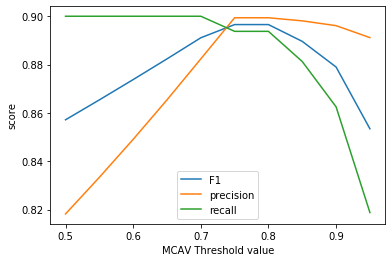

In [100]:
import matplotlib.pyplot as plt
plt.xlabel("MCAV Threshold value")
plt.ylabel("score")
plt.plot(threshold_vals, F1, label='F1')
plt.plot(threshold_vals, precision, label='precision')
plt.plot(threshold_vals, TP_rate, label='recall')
plt.legend()

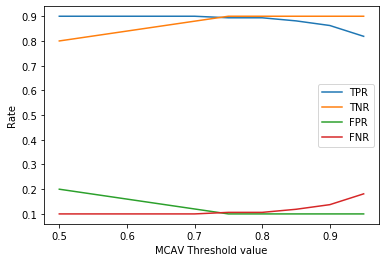

In [101]:
import matplotlib.pyplot as plt
plt.xlabel("MCAV Threshold value")
plt.ylabel("Rate")
plt.plot(threshold_vals, TP_rate, label='TPR')
plt.plot(threshold_vals, TN_rate, label='TNR')
plt.plot(threshold_vals, FP_rate, label='FPR')
plt.plot(threshold_vals, FN_rate, label='FNR')
plt.legend()